In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

In [2]:
# Set parameters
height, width, channels = 30, 30, 3
batch_size = 32
data_dir = r"C:\Users\fool0\OneDrive\Desktop\Capstone 1\Traffic Sign Recognization\archive\Train"
test_dir = r"C:\Users\fool0\OneDrive\Desktop\Capstone 1\Traffic Sign Recognization\archive\Test"
NUM_CATEGORIES = len(os.listdir(data_dir))

In [3]:
# Initialize ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    data_dir, target_size=(height, width), batch_size=batch_size, class_mode='sparse', subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    data_dir, target_size=(height, width), batch_size=batch_size, class_mode='sparse', subset='validation'
)

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [4]:
# Display a few training images using matplotlib
def visualize_images_matplotlib(generator):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    for i, ax in enumerate(axes):
        img = images[i]
        label = class_names[int(labels[i])]
        ax.imshow(img)
        ax.set_title(f"Class: {label}")
        ax.axis('off')
    plt.show()

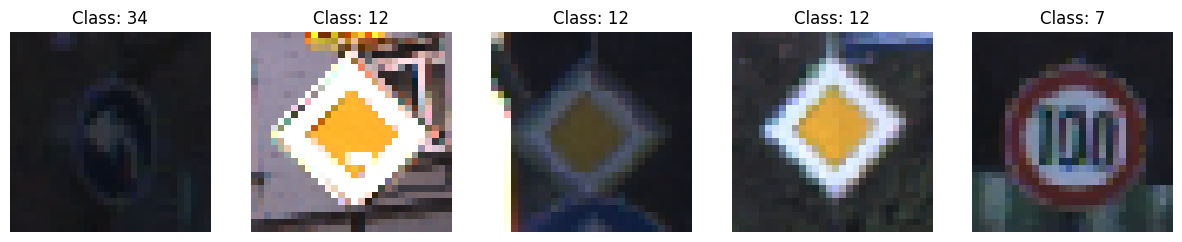

In [5]:
# Visualize images
visualize_images_matplotlib(train_generator)

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CATEGORIES, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(
    train_generator, epochs=10, validation_data=validation_generator,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 337s 340ms/step - accuracy: 0.2368 - loss: 2.8027 - val_accuracy: 0.7341 - val_loss: 0.9714
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 273s 279ms/step - accuracy: 0.6517 - loss: 1.0581 - val_accuracy: 0.8537 - val_loss: 0.5210
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 116s 118ms/step - accuracy: 0.7728 - loss: 0.6543 - val_accuracy: 0.8910 - val_loss: 0.3792
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 36s 37ms/step - accuracy: 0.8366 - loss: 0.4608 - val_accuracy: 0.9116 - val_loss: 0.2949
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 202s 206ms/step - accuracy: 0.8728 - loss: 0.3609 - val_accuracy: 0.9221 - val_loss: 0.2767
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 111s 114ms/step - accuracy: 0.8992 - loss: 0.2927 - val_accuracy: 0.9267 - val_loss: 0.2655
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9164 - loss: 0.2407 - val_accuracy: 0.9286 - val_loss: 0.2489
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9284 - loss:

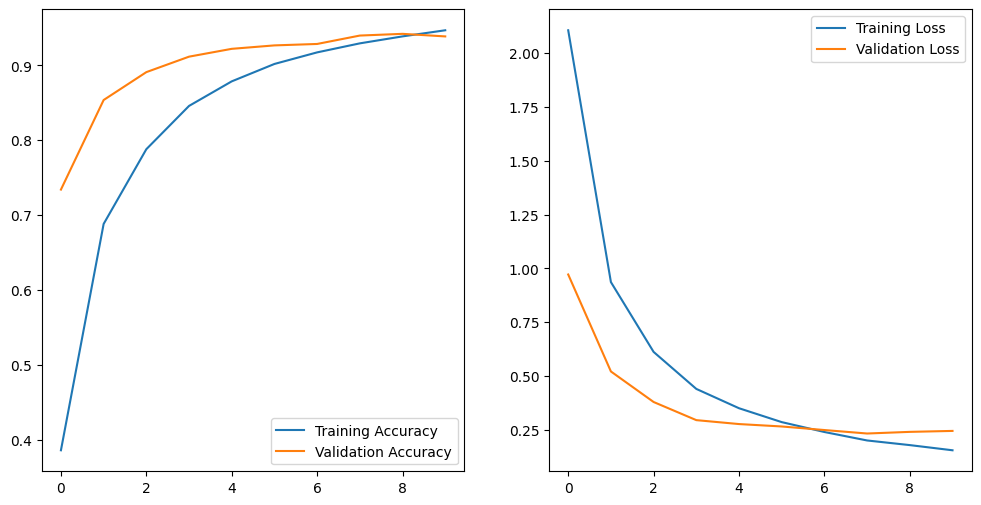

In [9]:
# Plot training history
def plot_training_history(history):
    epochs = range(len(history.history['accuracy']))
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

In [ ]:
# Save the model
model.save('traffic_sign_model.h5')
gemma_model.save('gemma_model.h5')

In [ ]:
# Convert to TensorFlow Lite
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('traffic_sign_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\fool0\AppData\Local\Temp\tmpz6ftdhjj\assets


INFO:tensorflow:Assets written to: C:\Users\fool0\AppData\Local\Temp\tmpz6ftdhjj\assets


Saved artifact at 'C:\Users\fool0\AppData\Local\Temp\tmpz6ftdhjj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 30, 30, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 43), dtype=tf.float32, name=None)
Captures:
  2387278256784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278258512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278258704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278256976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278256592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278259472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278257552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278259856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278260240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2387278261200: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9407 - loss: 0.2214
Validation Accuracy: 93.98%


In [ ]:
# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(height, width), batch_size=batch_size, class_mode='sparse', shuffle=False
)

Found 12630 images belonging to 43 classes.


In [ ]:
from sklearn.model_selection import train_test_split

# Extract images and labels from the train_generator
X, y = [], []
for _ in range(len(train_generator)):
	imgs, labels = next(train_generator)
	X.extend(imgs)
	y.extend(labels)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Get model predictions
y_pred = model.predict(X_test)
# Convert predictions to label indices (if predictions are probabilities)
y_pred_classes = np.argmax(y_pred, axis=1)  # for multi-class classification
y_true = y_test  # if y_test is not one-hot encoded


197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
# Confusion Matrix and Classification Report
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


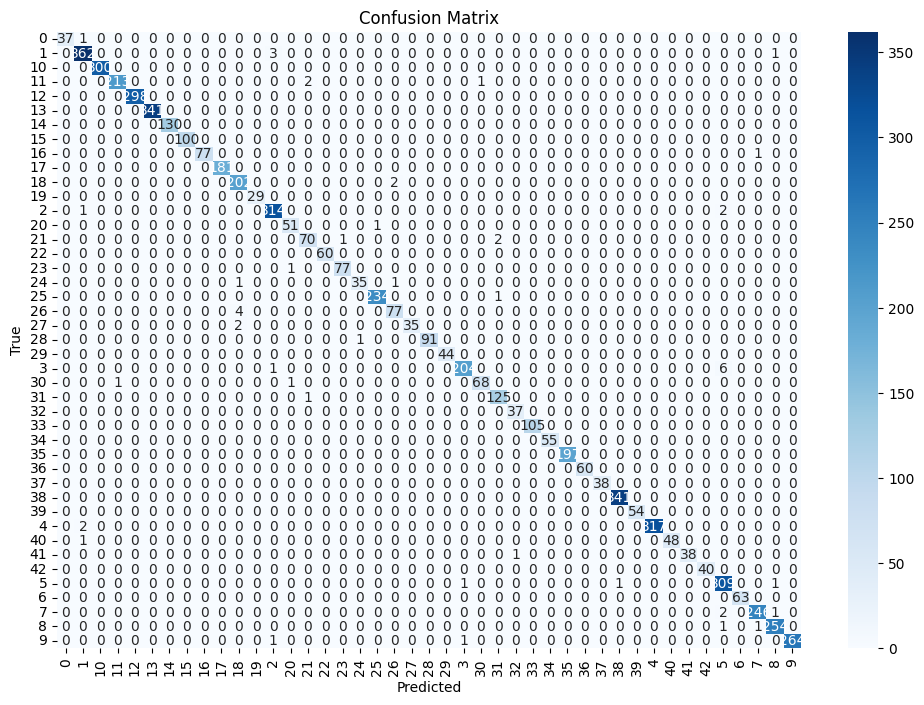

In [ ]:
# Class names for plotting and reporting
class_names = list(test_generator.class_indices.keys())
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
plot_confusion_matrix(y_true, y_pred_classes, class_names)

In [ ]:
from sklearn.metrics import classification_report

# Assuming `class_names` contains the names of all 43 classes in your dataset.
# Replace "Class 0", "Class 1", ..., "Class 42" with actual class labels if available.
class_names = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", 
               "Class 6", "Class 7", "Class 8", "Class 9", "Class 10", "Class 11",
               "Class 12", "Class 13", "Class 14", "Class 15", "Class 16", "Class 17",
               "Class 18", "Class 19", "Class 20", "Class 21", "Class 22", "Class 23",
               "Class 24", "Class 25", "Class 26", "Class 27", "Class 28", "Class 29",
               "Class 30", "Class 31", "Class 32", "Class 33", "Class 34", "Class 35",
               "Class 36", "Class 37", "Class 38", "Class 39", "Class 40", "Class 41", 
               "Class 42"]

# Print classification report with target names
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Alternatively, if class names are not available, use the labels parameter:
# print(classification_report(y_true, y_pred_classes, labels=range(43)))


              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.99        38
     Class 1       0.99      0.99      0.99       366
     Class 2       1.00      1.00      1.00       300
     Class 3       1.00      0.99      0.99       216
     Class 4       1.00      1.00      1.00       298
     Class 5       1.00      1.00      1.00       341
     Class 6       1.00      1.00      1.00       130
     Class 7       1.00      1.00      1.00       100
     Class 8       1.00      0.99      0.99        78
     Class 9       1.00      1.00      1.00       181
    Class 10       0.97      0.99      0.98       204
    Class 11       1.00      1.00      1.00        29
    Class 12       0.98      0.99      0.99       317
    Class 13       0.96      0.98      0.97        52
    Class 14       0.96      0.96      0.96        73
    Class 15       1.00      1.00      1.00        60
    Class 16       0.99      0.99      0.99        78
    Class 17       0.97    

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os

# Step 0: Configure Data and Model Parameters

# Define paths for training and testing directories
data_dir = r"C:\Users\fool0\OneDrive\Desktop\Capstone 1\Traffic Sign Recognization\archive\Train"
test_dir = r"C:\Users\fool0\OneDrive\Desktop\Capstone 1\Traffic Sign Recognization\archive\Test"

# Check if the directories exist
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Training directory not found: {data_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Testing directory not found: {test_dir}")

img_width, img_height = 64, 64  
batch_size = 32               
num_classes = 43              
epochs = 20                   

# Step 1: Define the Gemma Model
def create_gemma_model(input_shape=(img_width, img_height, 3), num_classes=num_classes): 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Step 2: Initialize and Compile the Gemma Model 
gemma_model = create_gemma_model()
gemma_model.compile(optimizer=Adam(learning_rate=0.001), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

# Step 3: Prepare the Data 
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10, 
                                   width_shift_range=0.1, 
                                   height_shift_range=0.1)
val_datagen = ImageDataGenerator(rescale=1./255)

try:
    train_data = train_datagen.flow_from_directory(
        data_dir, 
        target_size=(img_width, img_height), 
        batch_size=batch_size, 
        class_mode='categorical'
    )
    val_data = val_datagen.flow_from_directory(
        test_dir, 
        target_size=(img_width, img_height), 
        batch_size=batch_size, 
        class_mode='categorical'
    )
except Exception as e:
    print(f"Error loading data: {e}")
    raise

# Print information about the loaded data
print("Training data:")
print(train_data.class_indices)
print(f"Found {train_data.samples} images belonging to {len(train_data.class_indices)} classes.")

print("\nValidation data:")
print(val_data.class_indices)
print(f"Found {val_data.samples} images belonging to {len(val_data.class_indices)} classes.")

# Step 4: Train the Model with Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = gemma_model.fit(
    train_data, 
    epochs=epochs, 
    validation_data=val_data,
    callbacks=[reduce_lr, early_stopping]
)

# Step 5: Evaluate the Model
if val_data.samples > 0:
    test_loss, test_accuracy = gemma_model.evaluate(val_data)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
else:
    print("Validation data is empty. Please check the data directory and ensure it contains images.")

# Step 6: Visualize Training Results
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()
